## Visualizations

### Problem Statement: What features of a low-assessed real estate property are the most valuable for improving sale price?

In [207]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [208]:
pd.set_option('max_columns', None) # i want to see all columns printed out

In [209]:
# read training data
ames = pd.read_csv('../my_datasets/data_cleaning_eda_data/main_ames.csv').drop(columns = 'Unnamed: 0')

In [210]:
ames.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754.0,0.0,1479,0,0,2.0,1.0,3.0,1.0,Gd,6,Typ,0.0,NaN,Attchd,1976,RFn,2,475,TA,TA,Y,0.0,44.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209.0,0.0,2122,1,0,2.0,1.0,4.0,1.0,Gd,8,Typ,1.0,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0.0,74.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0.0,0.0,1057,1,0,1.0,0.0,3.0,1.0,Gd,5,Typ,0.0,NaN,Detchd,1953,Unf,1,246,TA,TA,Y,0.0,52.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1,2010,WD,109000


In [211]:
# these are the columns i am interested in
alt_cols = ['utilities', 'house_style', 'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 
            'mas_vnr_type', 'exter_qual', 'exter_cond', 'bsmt_qual', 'heating', 'heating_qc', 'central_air', 'electrical', 
           'garage_area', 'garage_qual',  'paved_drive', 'open_porch_sf', 'pool_area', 'pool_qc', 'fence']

In [212]:
num_cols = [i[0] for i in ames.dtypes.iteritems() if (i[1] != object)] # numeric columns

In [213]:
ames[alt_cols].head(3)

,utilities,house_style,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,bsmt_qual,heating,heating_qc,central_air,electrical,garage_area,garage_qual,paved_drive,open_porch_sf,pool_area,pool_qc,fence
0,AllPub,2Story,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,TA,GasA,Ex,Y,SBrkr,475,TA,Y,44.0,0.0,NaN,NaN
1,AllPub,2Story,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,Gd,GasA,Ex,Y,SBrkr,559,TA,Y,74.0,0.0,NaN,NaN
2,AllPub,1Story,2007,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,TA,GasA,TA,Y,SBrkr,246,TA,Y,52.0,0.0,NaN,NaN


In [214]:
ames.isnull().sum()[ames.isnull().sum() > 0] # looks like columns that should actually have NA values (representing that the house is missing that feature)

alley             1911
mas_vnr_type        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_type_2      56
fireplace_qu      1000
garage_type        113
garage_finish      114
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

#### Converting ordinal columns to numerical values for regression

In [215]:
to_ordinal_cols = ['bsmt_qual', 'exter_qual', 'exter_cond', 'heating_qc', 'kitchen_qual', 'garage_qual', 'pool_qc', 'fence']

In [216]:
ames[to_ordinal_cols] = ames[to_ordinal_cols].fillna('NA')
ames_test[to_ordinal_cols] = ames_test[to_ordinal_cols].fillna('NA')

In [217]:
for col in to_ordinal_cols:
    new_ord_col = ames[col].copy(deep=True)
    new_ord_col = new_ord_col.replace({'Gd': 4, 'TA': 3, 'Ex': 5, 'Fa': 2, 'Po': 1, 'NA': 0, 'MnPrv': 3, 'GdPrv': 4, 'GdWo': 2, 'MnWw': 1})
    ames[col + '_ordinal'] = new_ord_col
    
for col in to_ordinal_cols:
    new_ord_col = ames_test[col].copy(deep=True)
    new_ord_col = new_ord_col.replace({'Gd': 4, 'TA': 3, 'Ex': 5, 'Fa': 2, 'Po': 1, 'NA': 0, 'MnPrv': 3, 'GdPrv': 4, 'GdWo': 2, 'MnWw': 1})
    ames_test[col + '_ordinal'] = new_ord_col

In [218]:
ordinal_cols = [i for i in ames.columns if 'ordinal' in i ]
ames[ordinal_cols]

ordinal_cols = [i for i in ames_test.columns if 'ordinal' in i ]
ames_test[ordinal_cols]

,bsmt_qual_ordinal,exter_qual_ordinal,exter_cond_ordinal,heating_qc_ordinal,kitchen_qual_ordinal,garage_qual_ordinal,pool_qc_ordinal,fence_ordinal,neighborhood_ordinal
0,2,3,2,4,2,1,0,0,4
1,4,3,3,3,3,3,0,0,9
2,4,4,3,5,4,3,0,0,16
3,3,4,3,3,3,2,0,0,4
4,4,3,3,4,3,3,0,0,12
...,...,...,...,...,...,...,...,...,...
873,3,3,3,3,3,3,0,0,17
874,3,4,4,5,4,3,0,3,12
875,3,3,3,5,3,3,0,0,9
876,3,3,3,3,3,3,0,2,12


#### Making 'neighborhood' an ordinal value based on saleprice

In [219]:
gb_hood_price = ames.groupby('neighborhood')['saleprice'].mean().sort_values(ascending = True)

neighborhoods = []
rankings = []

count = 1
for hood, _ in gb_hood_price.iteritems():
    neighborhoods.append(hood)
    rankings.append(count)
    count += 1

d = {'neighborhood': neighborhoods, 'neighborhood_ordinal': rankings}
ames = pd.merge(ames, pd.DataFrame(data=d), how='left', on = 'neighborhood')
ames_test = pd.merge(ames_test, pd.DataFrame(data=d), how='left', on = 'neighborhood')

In [220]:
# plt.figure(figsize = (20,16))
# sns.heatmap(ames[num_cols_for_model].corr(), vmin = -1, annot = True, cmap='coolwarm');

#### Adding columns - rates, differences

In [221]:
# want to see the poly feature x^2 for this
ames["year_remod/add - year_built"] = ames['year_remod/add'] - ames['year_built']
ames['pool_area/lot_area'] = ames['pool_area']/ames['lot_area']

ames_test["year_remod/add - year_built"] = ames_test['year_remod/add'] - ames_test['year_built']
ames_test['pool_area/lot_area'] = ames_test['pool_area']/ames_test['lot_area']

In [222]:
ames[['year_remod/add - year_built', 'pool_area/lot_area', 'pool_area']].head(3)

,year_remod/add - year_built,pool_area/lot_area,pool_area
0,29,0.0,0.0
1,1,0.0,0.0
2,54,0.0,0.0


#### Changing ms_subclass dtype

In [223]:
ames['ms_subclass'] = ames['ms_subclass'].astype(object)
ames_test['ms_subclass'] = ames_test['ms_subclass'].astype(object)

----

In [224]:
ames["(year_remod/add - year_built)^2"] = ames["year_remod/add - year_built"]**2

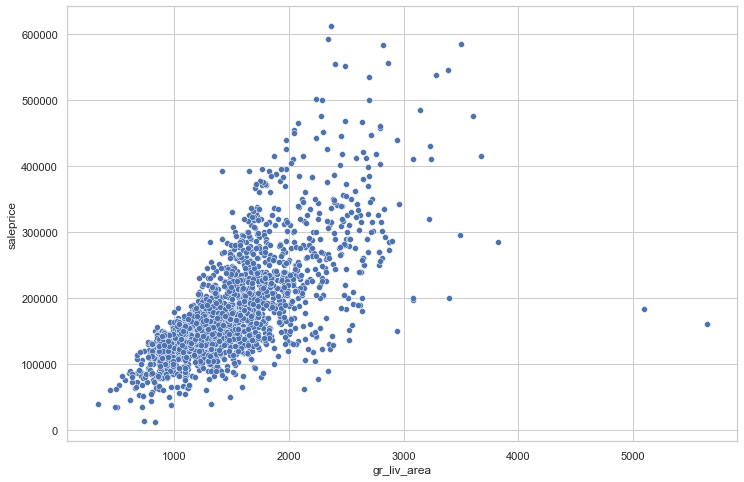

In [225]:
plt.figure(figsize = (12,8)) #ground living area vs sale price
sns.set_theme(style = 'whitegrid')
sns.scatterplot(x = ames["gr_liv_area"], y = ames['saleprice']);

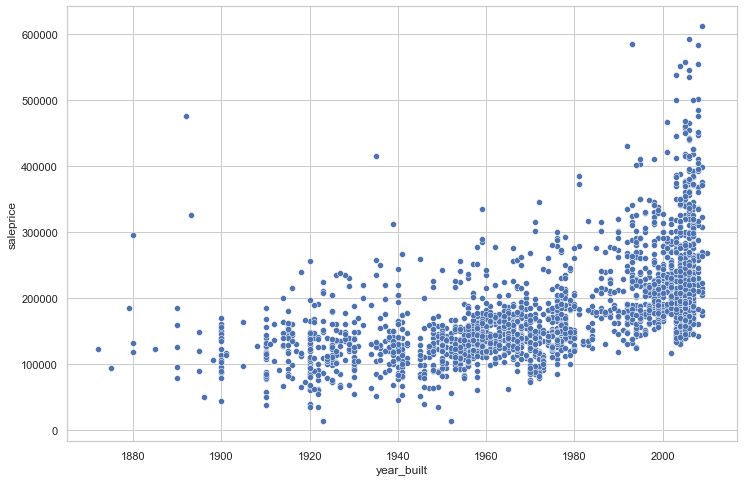

In [226]:
plt.figure(figsize = (12,8))
sns.scatterplot(x=ames['year_built'], y=ames['saleprice']);

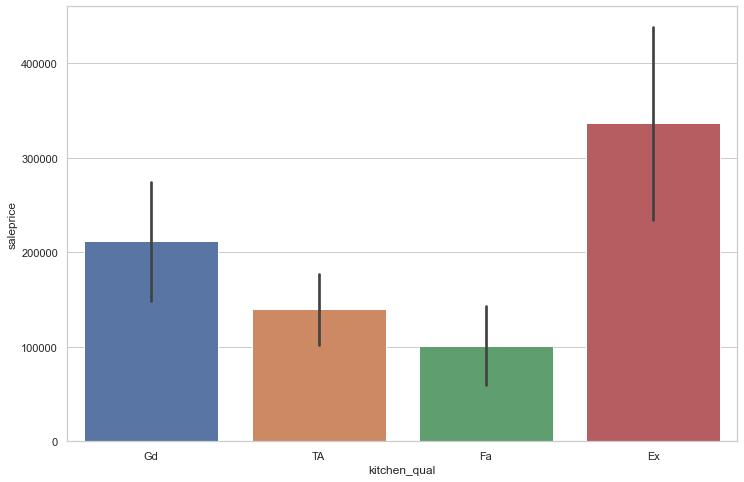

In [227]:
plt.figure(figsize = (12,8))
sns.barplot(x=ames['kitchen_qual'], y=ames['saleprice'], ci='sd');

In [228]:
median_sp = ames['saleprice'].median()
am_gb_hood = ames.groupby('neighborhood')

sp_mask = am_gb_hood['saleprice'].median() > median_sp
sp_mask = [i[1] for i in sp_mask.iteritems()]


am_gb_greateq_sp = am_gb_hood.filter(lambda x: x['saleprice'].median() >= median_sp)
am_gb_less_sp = am_gb_hood.filter(lambda x: x['saleprice'].median() < median_sp)

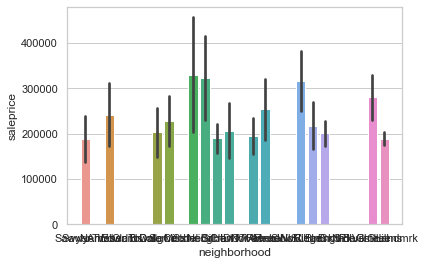

In [229]:
sns.barplot(x=ames['neighborhood'], y=am_gb_greateq_sp['saleprice'], ci='sd');

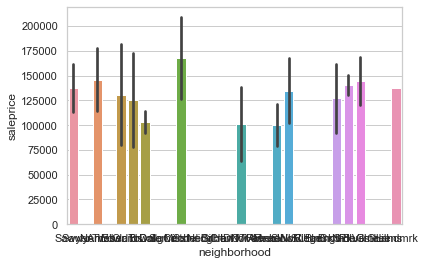

In [230]:
sns.barplot(x=ames['neighborhood'], y=am_gb_less_sp['saleprice'], ci='sd');

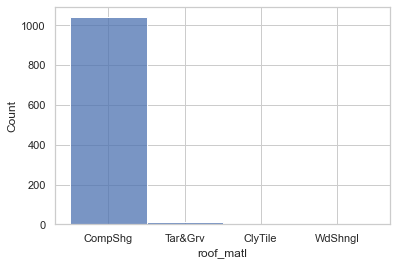

In [231]:
sns.histplot(data=am_gb_less_sp['roof_matl']);

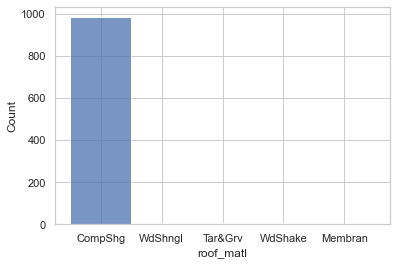

In [232]:
sns.histplot(data=am_gb_greateq_sp['roof_matl']);

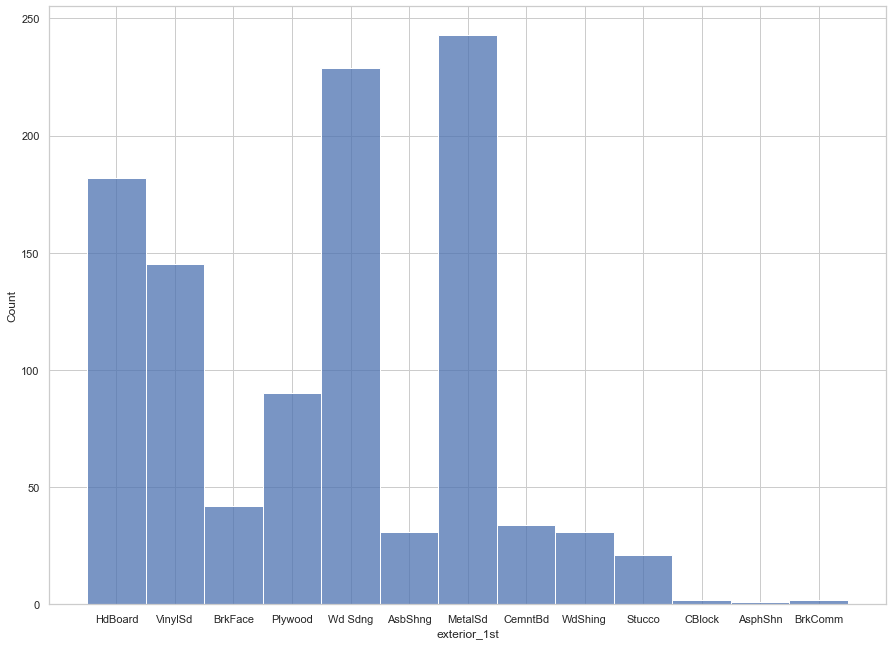

In [233]:
plt.figure(figsize=(15,11))
sns.set_style('whitegrid')
sns.histplot(data=am_gb_less_sp['exterior_1st']);

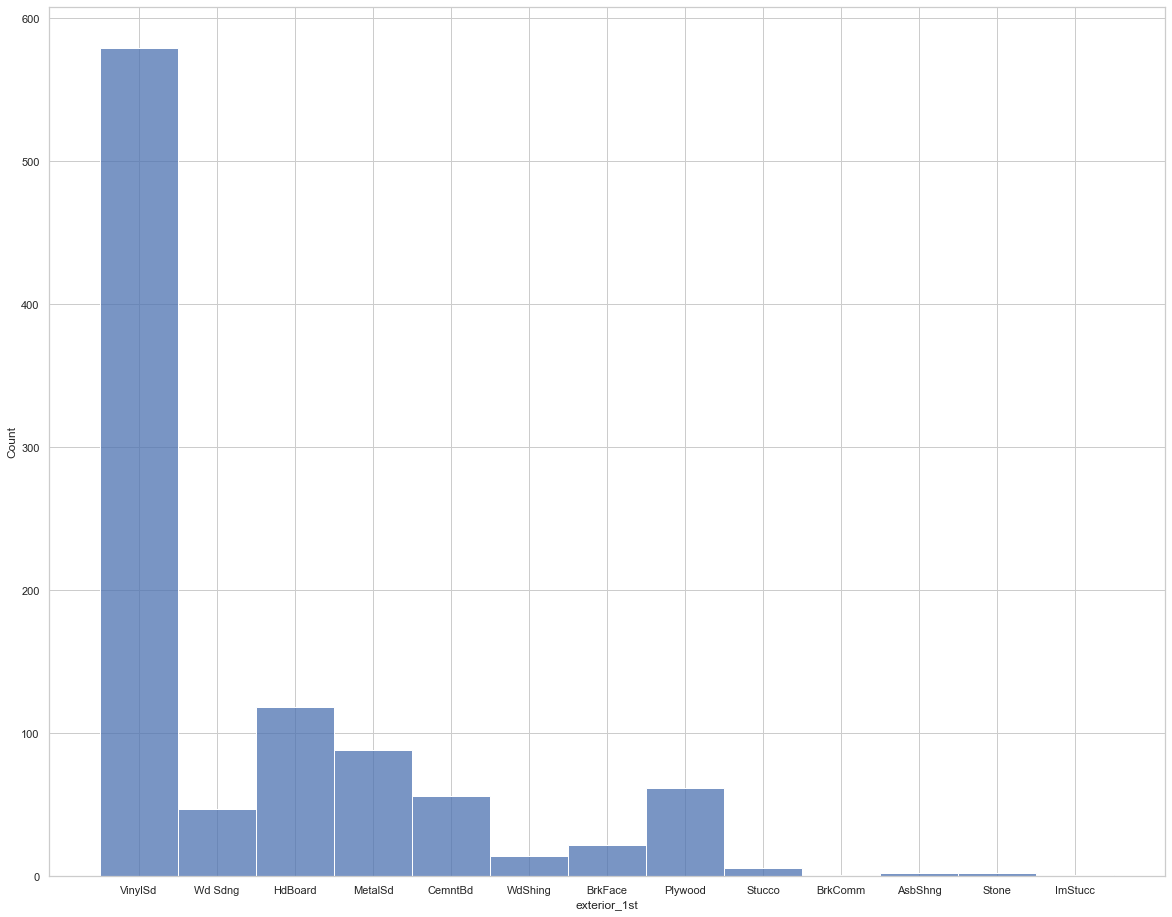

In [234]:
plt.figure(figsize=(20,16))
sns.histplot(data=am_gb_greateq_sp['exterior_1st']);

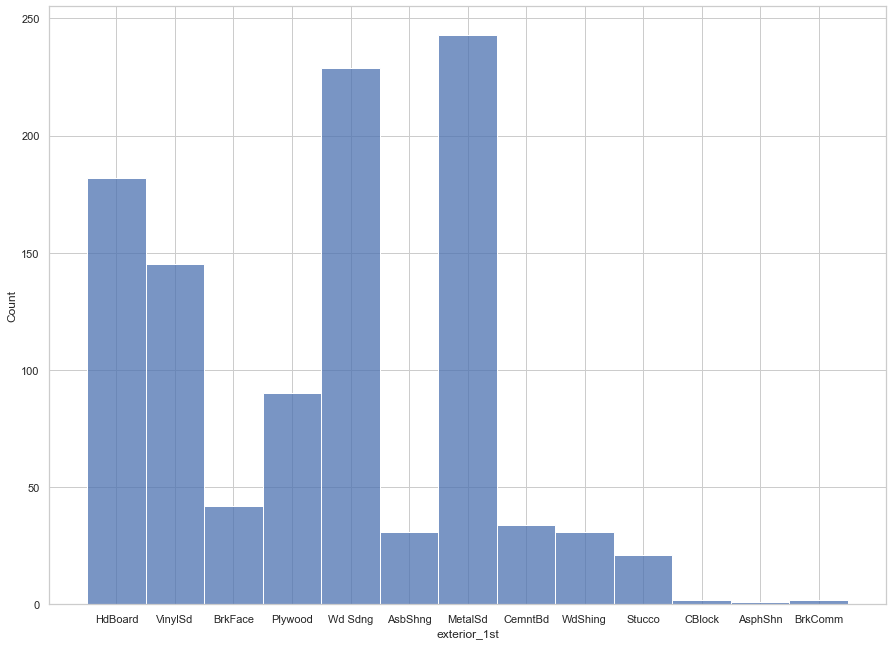

In [235]:
plt.figure(figsize=(15,11))
sns.set_style('whitegrid')
sns.histplot(data=am_gb_less_sp['exterior_1st']);

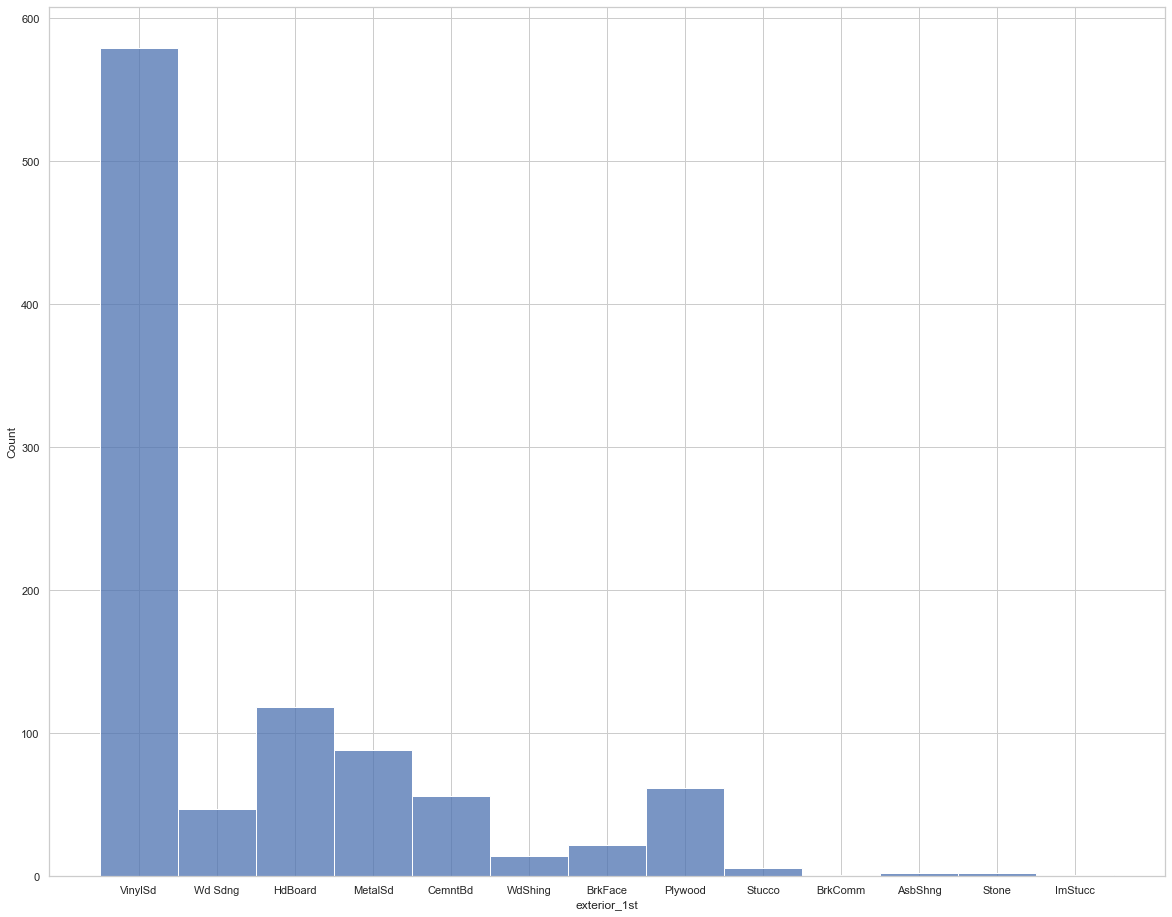

In [236]:
plt.figure(figsize=(20,16))
sns.histplot(data=am_gb_greateq_sp['exterior_1st']);

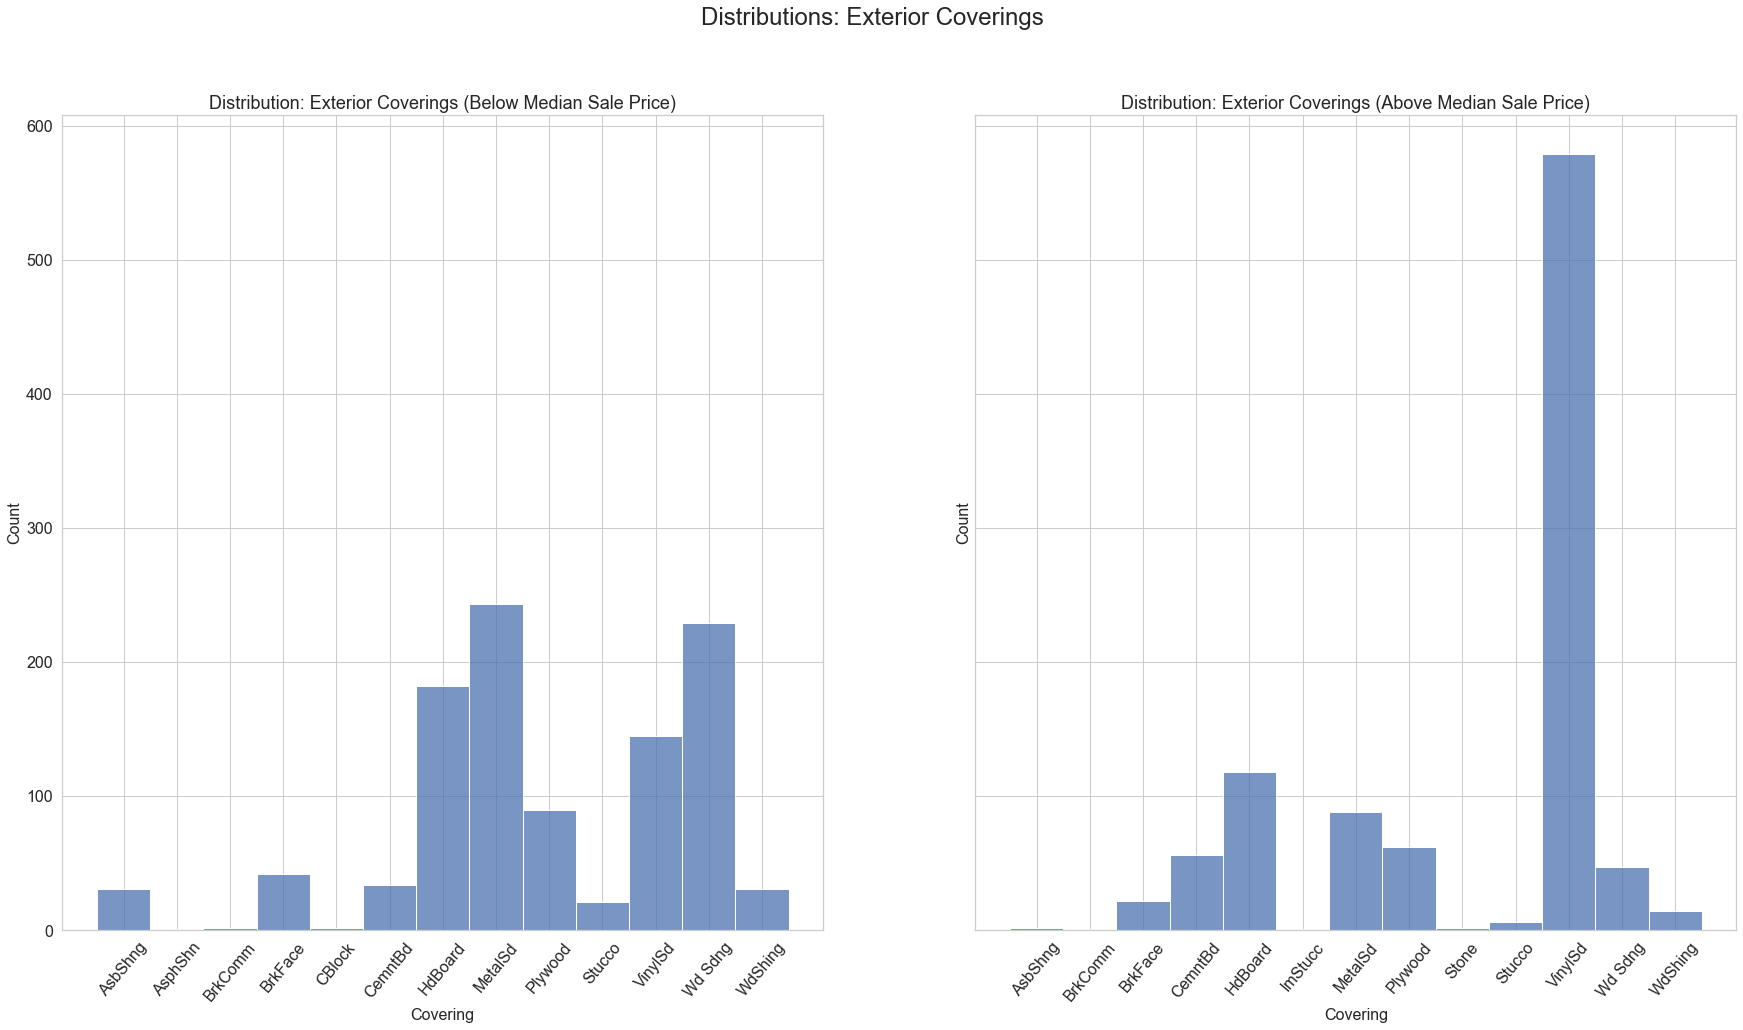

In [237]:
fig, axes = plt.subplots(1, 2, figsize=(30, 15), sharey = True)
fig.suptitle('Distributions: Exterior Coverings', fontsize=24)

plt.subplot(1, 2, 1)
sns.set_style('whitegrid')

plt.xlabel('Covering', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Distribution: Exterior Coverings (Below Median Sale Price)', fontsize = 18)
sns.histplot(data=am_gb_less_sp['exterior_1st'].sort_values());
plt.xticks(fontsize = 16, rotation = 50)
plt.yticks(fontsize = 16)



plt.subplot(1, 2, 2)
plt.xlabel('Covering', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Distribution: Exterior Coverings (Above Median Sale Price)', fontsize = 18)
sns.histplot(data=am_gb_greateq_sp['exterior_1st'].sort_values());
plt.xticks(fontsize = 16, rotation = 50)
plt.yticks(fontsize = 16);

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]), [])

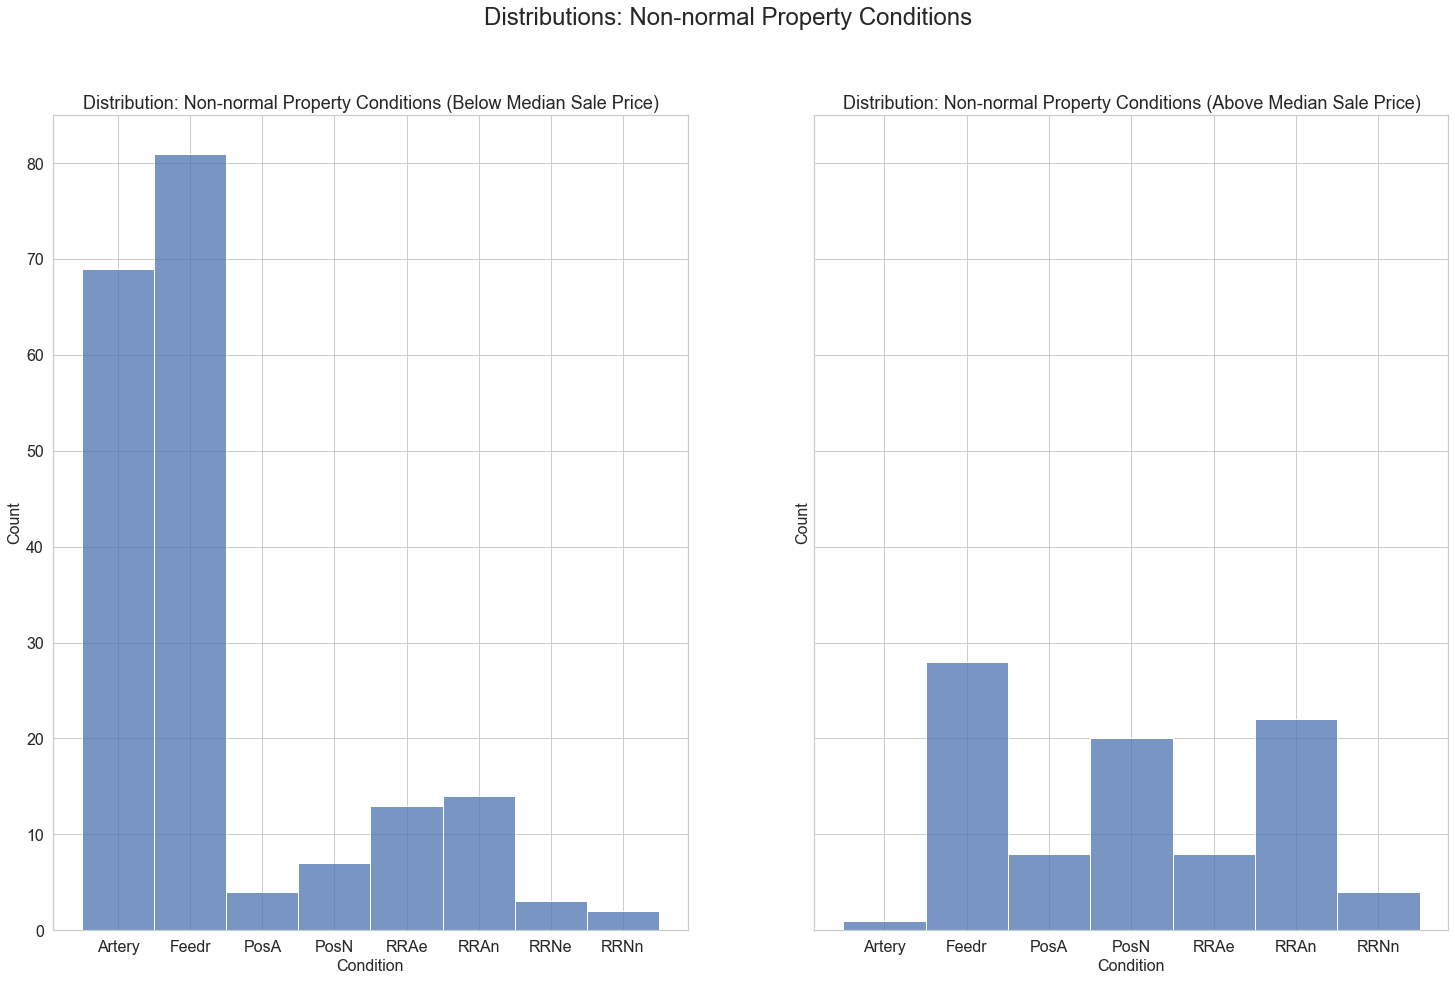

In [238]:
fig, axes = plt.subplots(1, 2, figsize=(25, 15), sharey = True)
fig.suptitle('Distributions: Non-normal Property Conditions', fontsize=24)

plt.subplot(1, 2, 1)
sns.set_style('whitegrid')

plt.xlabel('Condition', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Distribution: Non-normal Property Conditions (Below Median Sale Price)', fontsize = 18)
sns.histplot(data=am_gb_less_sp[am_gb_less_sp['condition_1'] != 'Norm']['condition_1'].sort_values());
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)



plt.subplot(1, 2, 2)
plt.xlabel('Condition', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Distribution: Non-normal Property Conditions (Above Median Sale Price)', fontsize = 18)
sns.histplot(data=am_gb_greateq_sp[am_gb_greateq_sp['condition_1'] != 'Norm']['condition_1'].sort_values());
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

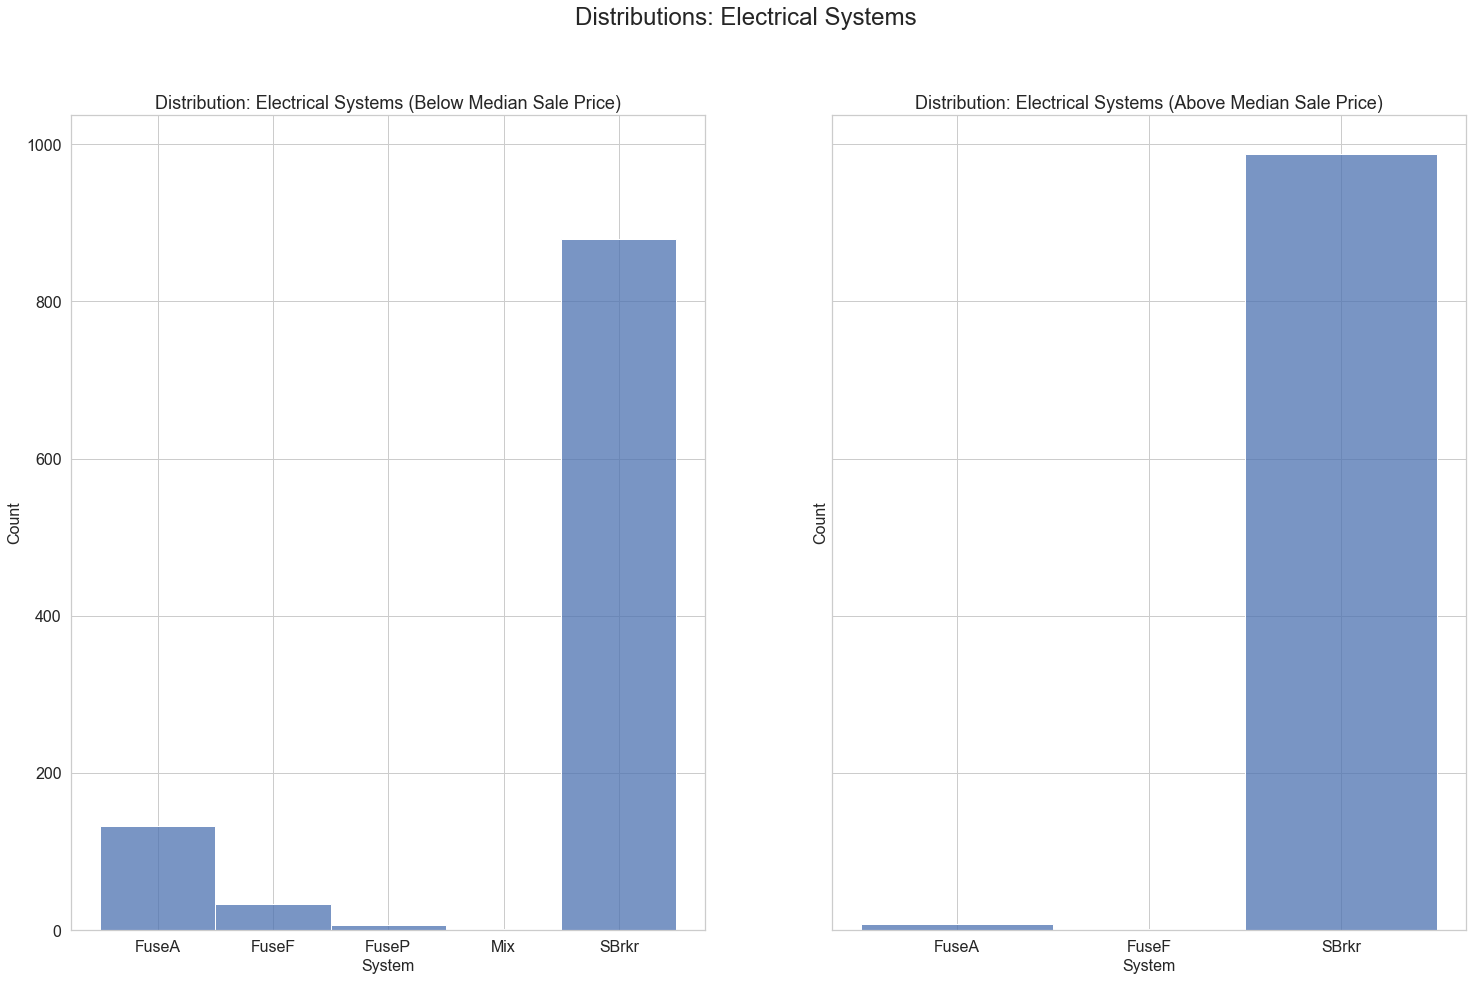

In [239]:
fig, axes = plt.subplots(1, 2, figsize=(25, 15), sharey = True)
fig.suptitle('Distributions: Electrical Systems', fontsize=24)

plt.subplot(1, 2, 1)
sns.set_style('whitegrid')

plt.xlabel('System', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Distribution: Electrical Systems (Below Median Sale Price)', fontsize = 18)
sns.histplot(data=am_gb_less_sp['electrical'].sort_values());
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)



plt.subplot(1, 2, 2)
plt.xlabel('System', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Distribution: Electrical Systems (Above Median Sale Price)', fontsize = 18)
sns.histplot(data=am_gb_greateq_sp['electrical'].sort_values());
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]), [])

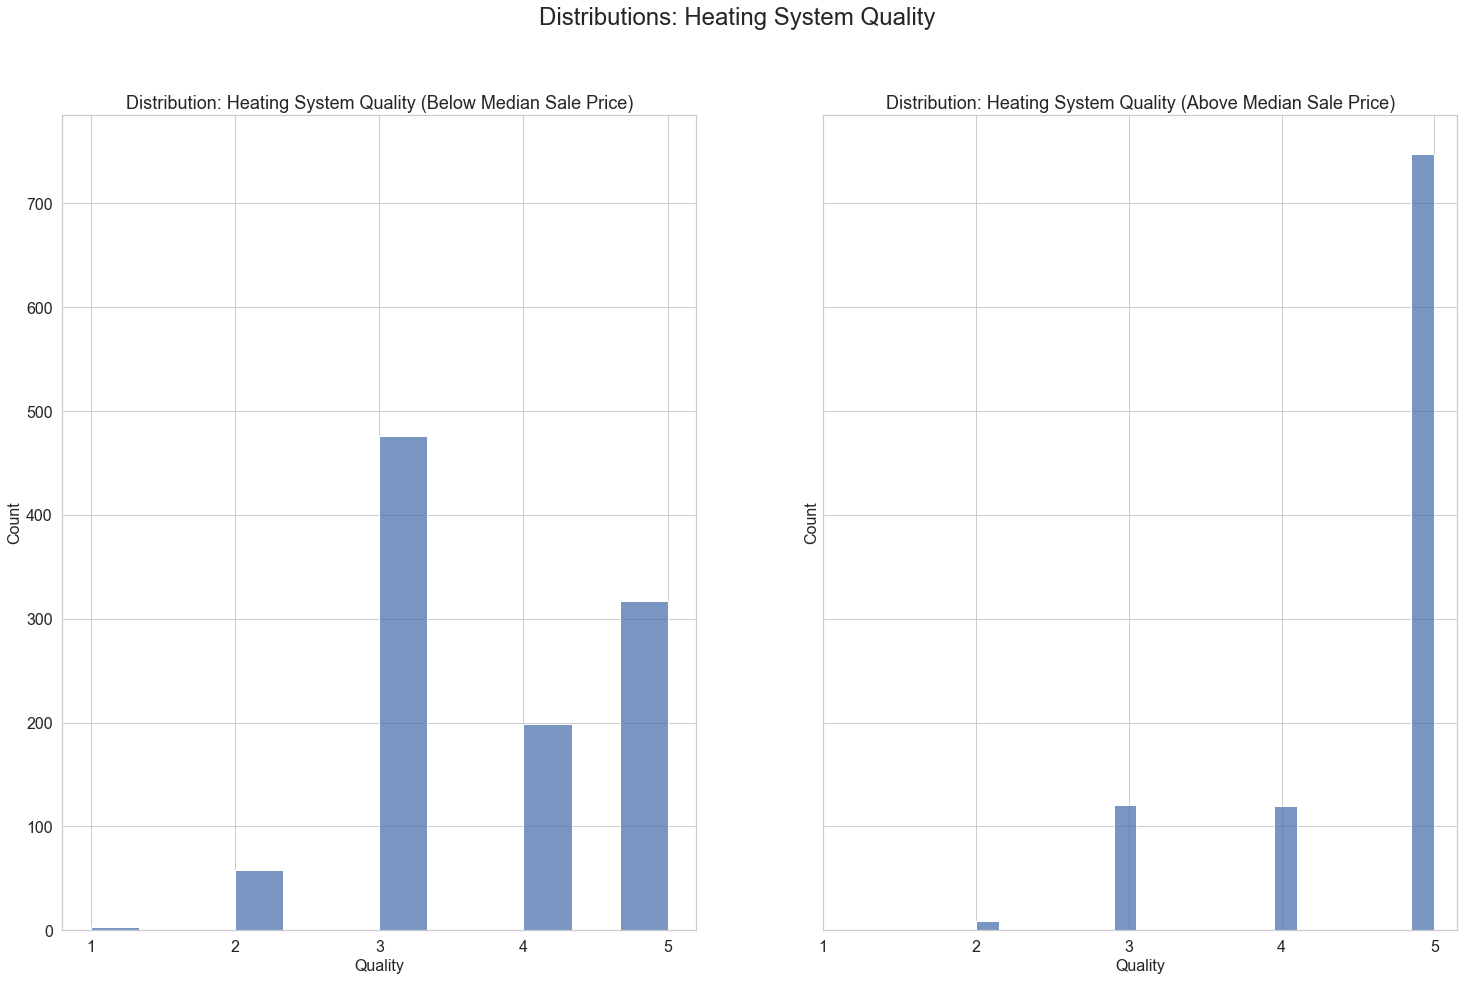

In [240]:
fig, axes = plt.subplots(1, 2, figsize=(25, 15), sharey = True)
fig.suptitle('Distributions: Heating System Quality', fontsize=24)

plt.subplot(1, 2, 1)
sns.set_style('whitegrid')

plt.xlabel('Quality', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Distribution: Heating System Quality (Below Median Sale Price)', fontsize = 18)
sns.histplot(data=am_gb_less_sp['heating_qc_ordinal'].sort_values());
plt.xticks(ticks = list(range(1,6)), fontsize = 16)
plt.yticks(fontsize = 16)



plt.subplot(1, 2, 2)
plt.xlabel('Quality', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Distribution: Heating System Quality (Above Median Sale Price)', fontsize = 18)
sns.histplot(data=am_gb_greateq_sp['heating_qc_ordinal'].sort_values());
plt.xticks(ticks = list(range(1,6)), fontsize = 16)
plt.yticks(fontsize = 16)

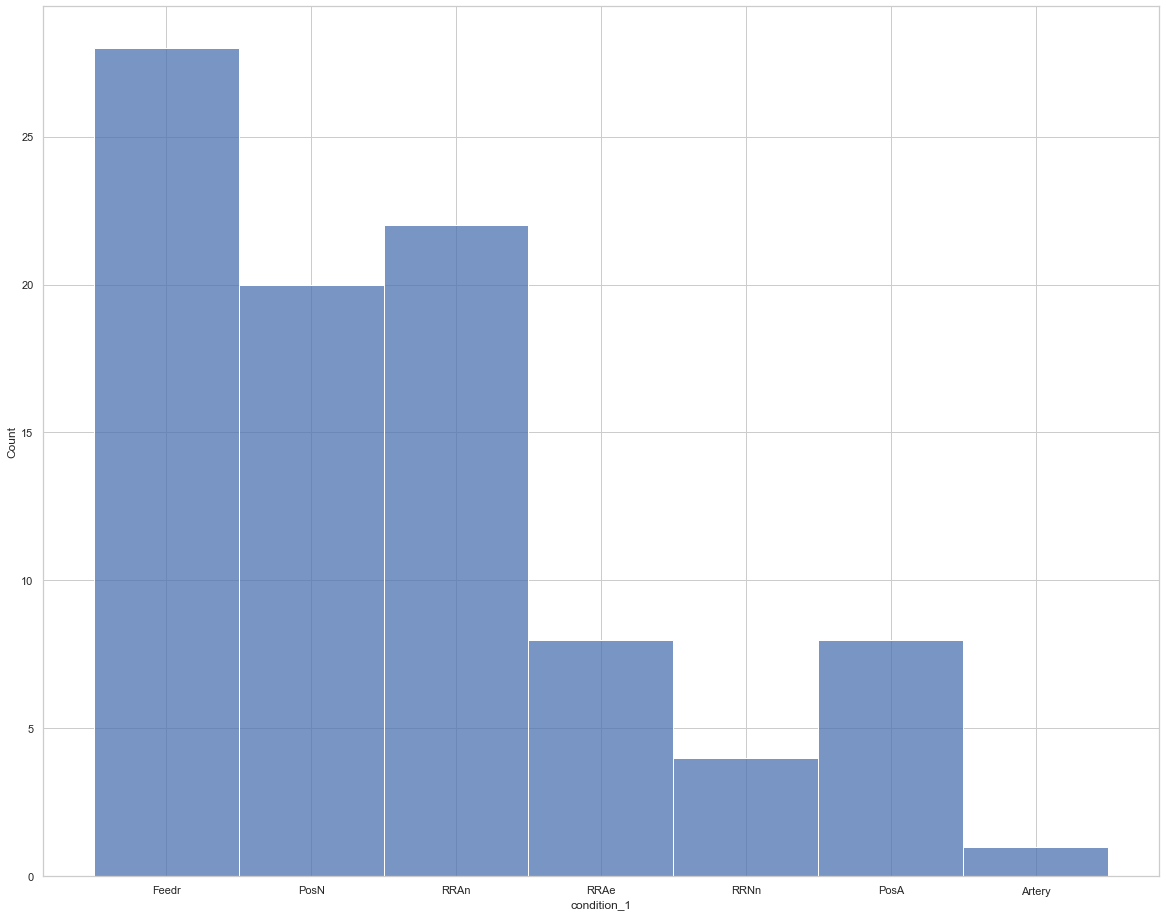

In [241]:
plt.figure(figsize=(20,16))
sns.set_style('whitegrid')
sns.histplot(data=am_gb_greateq_sp[am_gb_greateq_sp['condition_1'] != 'Norm']['condition_1']);

In [242]:
ames['condition_1'].value_counts(normalize=True)

Norm      0.861531
Feedr     0.053145
Artery    0.034130
RRAn      0.017552
PosN      0.013164
RRAe      0.010239
PosA      0.005851
RRNn      0.002925
RRNe      0.001463
Name: condition_1, dtype: float64

In [243]:
am_gb_less_sp['saleprice'].count(), am_gb_greateq_sp['saleprice'].count()

(1053, 998)

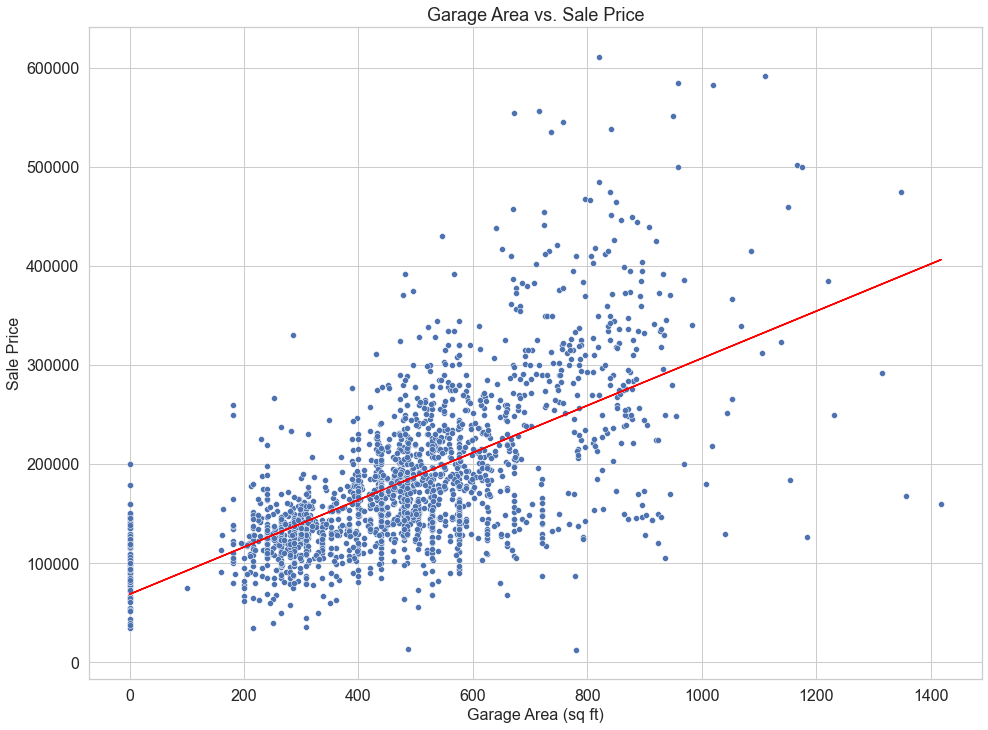

In [244]:
# Garage area vs Sale price
plt.figure(figsize=(16,12))
sns.set_style('whitegrid')

plt.xlabel('Garage Area (sq ft)', fontsize = 16)
plt.ylabel('Sale Price', fontsize = 16)
plt.title('Garage Area vs. Sale Price', fontsize = 18)
sns.scatterplot(x=ames['garage_area'], y = ames['saleprice']);

a, b = np.polyfit(ames['garage_area'], ames['saleprice'] , 1)

plt.plot(ames['garage_area'], (a*ames['garage_area'])+b, color='red')

plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

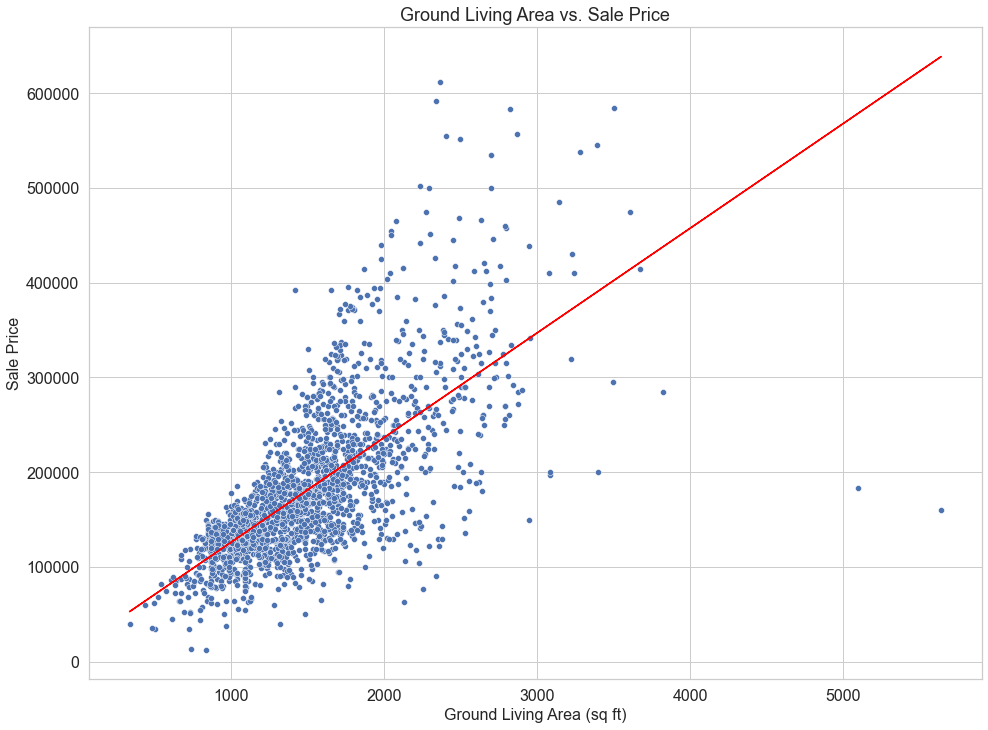

In [247]:
# Ground living area vs Sale price
plt.figure(figsize=(16,12))

sns.set_style('whitegrid')

plt.xlabel('Ground Living Area (sq ft)', fontsize = 16)
plt.ylabel('Sale Price', fontsize = 16)
plt.title('Ground Living Area vs. Sale Price', fontsize = 18)
sns.scatterplot(x=ames['gr_liv_area'], y = ames['saleprice']);

a, b = np.polyfit(ames['gr_liv_area'], ames['saleprice'] , 1)
plt.plot(ames['gr_liv_area'], (a*ames['gr_liv_area'])+b, color='red')


plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);